# Detecting and characterising extrasolar planets using radial velocity technique

## Introduction

The possibility of the existence of planets like Earth has always aroused the attention of people. A turning point in this field was made in 1995, when Didier Queloz and and Michel Mayor announced the discovery of a planet orbiting a main sequence star, 51 Pegasi \[1\]. This discovery was made by using the radial velocity technique, which is, nowadays, one of the most prolific techniques, despite having limitations \[2\]. It relates the position of a body on its orbit and its radial velocity, although for elliptical orbits, both the position and the velocity of the object as a function of time do not varies linearly. The aim of this report is to characterise an extrasolar planet and its orbit by using the analysed radial velocity data and the fitted theoretical curve to the data.

## Methods

In order to compute the true anomaly $(f)$, we first found the eccentric anomaly $(E)$, by using the mean anomaly $(M)$ and the eccentricity $(e)$:

\begin{equation}
E−esinE=M
\end{equation}

Knowing that $M$ is defined as:

\begin{equation}
M=\frac{2\pi(t-T_p)}{P}
\end{equation}

We then performed the Newton\-Raphson method, in which we linearised the function at some guess $E_o$ .



In [1]:
from numpy import sqrt, sin, cos, pi
import numpy as np
P = 20
t = P/2
T = 0                                                         #Tp defined as T
M = ((2*pi)*(t - T))/P

print (M)
#---------------------------------------------------------------------------
def k_q(M, e, E):                                             #To get k_q function we manipulated the Kepler's equation for the Mean anomaly, equating the function to zero
    return E - e*sin(E) - M

def k_qp(e, E):
    return 1 - e*cos(E)                                       #To get k_qp we take the derivative of k_q

def newton_step(M, e, E0):
    return (E0 - (k_q(M, e, E0)/k_qp(e, E0)))

e = 0.6
M = ((2*pi)*(t - T))/P
def newton_root(M, e):
    E0 = M
    E1 = (E0 - (k_q(M, e, E0)/k_qp(e, E0)))
    i_step = 1
    E0 = M
    while i_step <= 35 or abs(E1 - E0) > epsilon :
        E0, E1 = E1, newton_step(M, e, E1)
        i_step = i_step + 1
        return E1
newton_root(M, e)                                            #By using the Mean anomaly and the eccentricity we find the Eccentric anomaly E

3.141592653589793


3.141592653589793

After confirming that the Newton\-Raphson method works for a few values of $M$ and $e$ , we proceeded to find a value of $f$ by computing at $t=0.1n$  days, where $n$ runs from 0 to 200. By using the following expressions:

\begin{equation}
\cos f = \frac{\cos E -e}{1-e \cos E}\\\tag{3}
\end{equation}

\begin{equation}
\sin f = \frac{\sqrt{1-e^2} \sin E}{1-e \cos E}\tag{4}
\end{equation}

We subsequently found the true anomaly by using: 

\begin{equation}
f = \tan^{-1} \left(\frac{\sin f}{\cos f} \right).\tag{5}
\end{equation}

In order to sketch the graph we found the radial position $r$  which depends on $f$ since the orbit is an ellipse. If the semi\-major axis $a$ and the eccentricity of the ellipse are known, the we can calculate $r$ by using the following formula: 

\begin{equation}
r = \frac{a(1-e^2)}{1+e\cos f}\tag{6}
\end{equation}

We can also determine the cartesian coordinates \($x$ and $y$\) to be:

\begin{equation}
x = r\cos f \\\tag{7}
\end{equation}

\begin{equation}
y = r\sin f.\tag{8}
\end{equation}

In this case we defined $a=1$ and $e=0.6$ 


In [2]:
E = newton_root(M, e) # eccentric anomaly
cosf= (cos(E) - e)/(1 - e*cos(E))
sinf= (sqrt(1 - e**2) * sin(E))/(1 - e * cos(E))
f = np.arctan2(sinf, cosf)
print (f)

a = 1
r = (a * (1 - e**2))/(1 + (e * cosf))
print (r)
#---------------------------------------------------------------------------
t_list = []
M_list = []
E_list = []
f_list = []
r_list = []
x_list = []
y_list = []

def mean_anomaly(t, T, P):
    M = ((2*pi)*(t - T))/P
    return M

for n in range(200):
    t_list.append(0.1*n)
for t in t_list:
    M = ((2*pi)*(t - T))/P
    M_list.append(M)
for M in M_list:
    E = newton_root(M, e)
    E_list.append(E)
for E in E_list:
    cosf= (cos(E) - e)/(1 - e*cos(E))
    sinf= (sqrt(1 - e**2) * sin(E))/(1 - e * cos(E))
    f = np.arctan2(sinf, cosf)
    f_list.append(f)
for f in f_list:
    r = (a * (1 - e**2))/(1 + (e * cos(f)))
    x = r * cos(f)
    y = r * sin(f)
    x_list.append(x)
    y_list.append(y)
print(t_list)
print(x_list)
print(y_list)
len(t_list)

3.141592653589793
1.5999999999999999
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9

200

We can confirm that the solutions that we previously used works\($e=0.6$  for the eccentricity, $P=20$ for the orbital period, $T_p=0$ for the time of pericentre passage\), by plotting the true anomaly $f$ as a function of time:


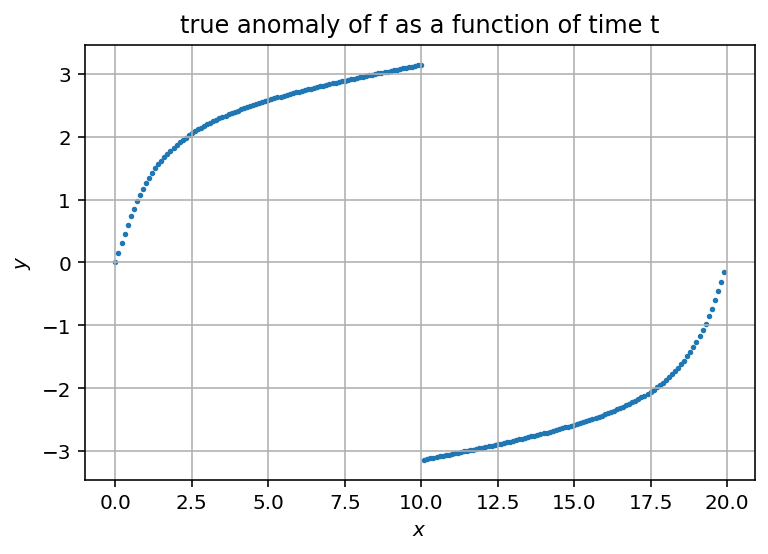

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import tan, cos
plt.scatter(t_list, f_list, s=3)
plt.title("true anomaly of f as a function of time t")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()

Then, once again, using the values listed above and using 1 as the value of the semi\-major axis, we can get the orbit:


<ipython-input-4-69207b87726c>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


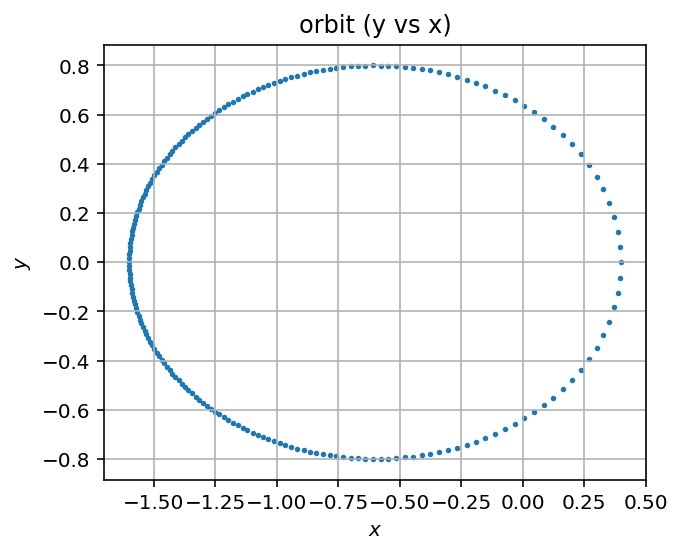

In [4]:
plt.scatter(x_list, y_list, s=3)
plt.title("orbit (y vs x)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axes().set_aspect('equal')
plt.grid()

Subsequently we loaded a data set of 3 observed stars from the following files \(in each of them the first column is the time in days, the second comlumn is the radial velocity of the star in metres per seconds, while the third column is the uncertainty in the measurement of the radial velocity in metres per second\):



In [5]:
from numpy import loadtxt
loadtxt('star-01.dat', dtype = 'float', comments = '#')

array([[   0.     ,  -31.4    ,    3.8    ],
       [  21.90039,    0.8    ,    8.7    ],
       [  55.91992,   39.5    ,    4.7    ],
       [  96.82422,   78.4    ,    4.     ],
       [ 244.22168,  197.     ,    4.8    ],
       [ 263.22852,  225.1    ,    5.2    ],
       [ 305.13672,  292.4    ,    5.1    ],
       [ 326.09473,   79.7    ,    4.7    ],
       [ 326.98926,   64.8    ,    4.2    ],
       [ 327.15723,   49.1    ,    4.1    ],
       [ 328.01758,   25.6    ,    4.     ],
       [ 328.1416 ,   15.7    ,    5.2    ],
       [ 328.94824,  -12.9    ,    4.1    ],
       [ 329.14355,  -26.4    ,    4.4    ],
       [ 329.98926,  -50.5    ,    4.1    ],
       [ 330.1377 ,  -19.1    ,    3.9    ],
       [ 346.875  , -287.2    ,    3.9    ],
       [ 347.12207, -303.7    ,    4.     ],
       [ 358.89844, -291.1    ,    4.4    ],
       [ 359.07227, -294.9    ,    3.8    ],
       [ 360.00879, -281.2    ,    4.     ],
       [ 360.94922, -276.5    ,    3.8    ],
       [ 3

In [6]:
loadtxt('star-02.dat', dtype = 'float', comments = '#')


array([[   0.     , -279.9    ,    5.2    ],
       [   1.97629, -277.3    ,    2.6    ],
       [  26.95405,   26.2    ,    1.1    ],
       [  87.55244, -312.5    ,    2.2    ],
       [  88.64033, -317.3    ,    2.1    ],
       [  89.59443, -313.4    ,    1.8    ],
       [  90.70674, -318.5    ,    2.1    ],
       [   3.96862, -264.5    ,    2.     ],
       [   4.96061, -269.6    ,    2.2    ],
       [   7.93054, -242.1    ,    1.6    ],
       [   8.79413, -238.8    ,    2.7    ],
       [   9.96835, -230.9    ,    2.2    ],
       [  11.97598, -206.6    ,    1.6    ],
       [  27.88495,   55.5    ,    1.9    ],
       [  28.88343,   79.2    ,    2.6    ],
       [  31.90154,  164.8    ,    1.9    ],
       [  33.86736,  221.7    ,    1.7    ],
       [  55.84686,  -19.8    ,    2.     ],
       [  56.82049,  -42.8    ,    2.5    ],
       [  62.71307, -135.1    ,    2.1    ],
       [  63.69899, -151.     ,    1.4    ],
       [  69.76334, -203.     ,    1.9    ],
       [  

In [7]:
loadtxt('star-03.dat', dtype = 'float', comments = '#')

array([[ 0.00000e+00, -1.53000e+02,  7.50000e+00],
       [ 5.15640e+00, -5.62000e+01,  3.40000e+00],
       [ 4.53300e-02, -1.71300e+02,  4.00000e+00],
       [ 9.87550e-01, -1.44400e+02,  3.90000e+00],
       [ 1.91220e+00, -7.35000e+01,  7.20000e+00],
       [ 2.04990e+00, -4.61000e+01,  7.50000e+00],
       [ 3.91616e+00,  9.44000e+01,  4.10000e+00],
       [ 1.54679e+00, -7.05000e+01,  4.40000e+00],
       [ 2.54255e+00,  2.32000e+01,  7.20000e+00],
       [ 5.89500e-02, -1.26500e+02,  5.50000e+00],
       [ 1.05895e+00, -8.56000e+01,  5.50000e+00],
       [ 2.05505e+00,  9.30000e+00,  5.60000e+00],
       [ 7.47860e-01, -1.12900e+02,  4.50000e+00],
       [ 1.78192e+00, -3.58000e+01,  5.90000e+00],
       [ 2.77700e+00,  8.75000e+01,  4.20000e+00],
       [ 3.77799e+00,  1.22600e+02,  4.30000e+00],
       [ 2.66180e+00,  6.40000e+01,  4.70000e+00],
       [ 3.58966e+00,  1.31300e+02,  4.40000e+00],
       [ 4.66175e+00,  5.50000e+01,  4.80000e+00],
       [ 5.66897e+00, -7.70000e

We then unpacked the data files of each star, creating an array for each column: 



In [8]:
#----------Star 1--------------------------------

print("Star 1 data")
time = loadtxt('star-01.dat', usecols = 0)
radial_velocity = loadtxt('star-01.dat', usecols = 1)
uncertainty = loadtxt('star-01.dat', usecols = 2)
print(time)
print(radial_velocity)
print(uncertainty)

#----------Star 2--------------------------------

print("Star 2 data")
time2 = loadtxt('star-02.dat', usecols = 0)
radial_velocity2 = loadtxt('star-02.dat', usecols = 1)
uncertainty2 = loadtxt('star-02.dat', usecols = 2)
print(time2)
print(radial_velocity2)
print(uncertainty2)

#----------Star 3--------------------------------

print("Star 3 data")
time3 = loadtxt('star-03.dat', usecols = 0)
radial_velocity3 = loadtxt('star-03.dat', usecols = 1)
uncertainty3 = loadtxt('star-03.dat', usecols = 2)
print(time3)
print(radial_velocity3)
print(uncertainty3)

Star 1 data
[  0.       21.90039  55.91992  96.82422 244.22168 263.22852 305.13672
 326.09473 326.98926 327.15723 328.01758 328.1416  328.94824 329.14355
 329.98926 330.1377  346.875   347.12207 358.89844 359.07227 360.00879
 360.94922 361.07324 361.92578 362.05664 362.8877  363.08496 393.90527
 394.90332 395.91211 396.88477 397.86719 412.87402 413.85352 414.85742
 420.86426 421.87891 422.84863 423.8623  424.8457  438.85254 439.85449
 462.87305 477.78516 478.77832 479.77051 480.77051 488.75488  62.40391
  99.31895 101.37559 111.31309 140.2623  165.26816 166.15    167.22715
 188.17832 198.23984 216.05723 227.11875 228.09336 229.08555 241.06309
 243.09727 256.07578 258.03184 268.05527 270.01621 275.02109 287.01523
 298.01035 298.96641 300.01719 308.97715 309.97324 311.00645 320.95957
 321.98496 322.93223 331.93125 332.95664 333.92441 334.92637 335.92539
 336.92246 345.90977 471.33848 472.33164  10.38203  58.30977  94.21895
  96.24922 130.1877  154.15156 156.16035 172.12812 318.52559 385.

Finally we plotted the graph of the velocity vs time of each star.


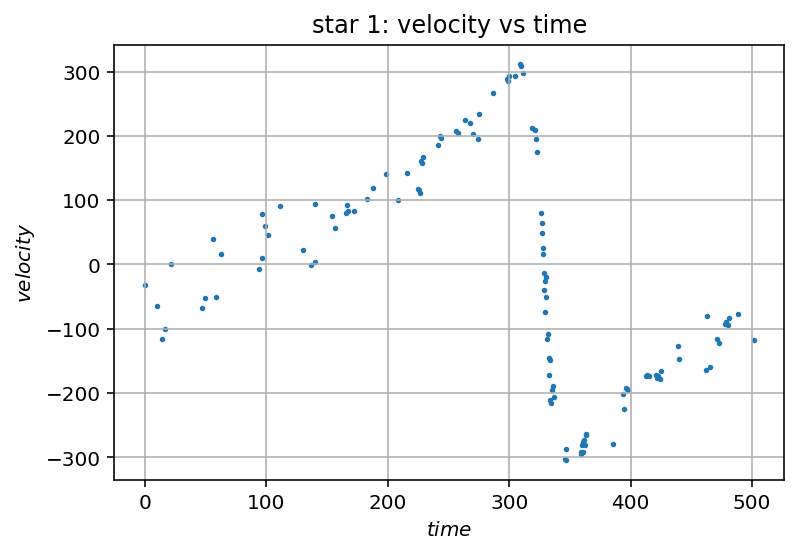

In [9]:
#Star 1

%matplotlib inline
import matplotlib.pyplot as plt
time_data, vr_data, vr_err = loadtxt("star-01.dat", unpack = True)
plt.scatter(time_data, vr_data, s=3)
plt.title("star 1: velocity vs time")
plt.xlabel("$time$")
plt.ylabel("$velocity$")
plt.grid()


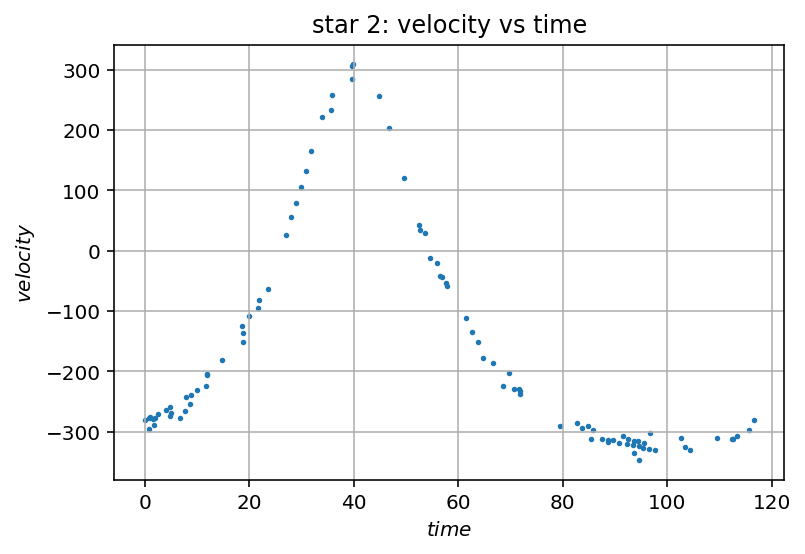

In [10]:
#Star 2

%matplotlib inline
import matplotlib.pyplot as plt
time_data2, vr_data2, vr_err2 = loadtxt("star-02.dat", unpack = True)
plt.scatter(time_data2, vr_data2, s=3)
plt.title("star 2: velocity vs time")
plt.xlabel("$time$")
plt.ylabel("$velocity$")
plt.grid()

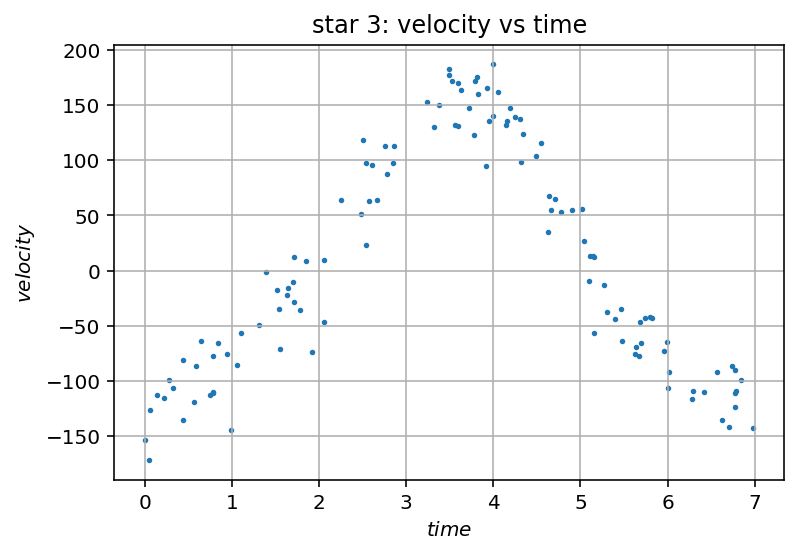

In [11]:
#Star 3

%matplotlib inline
import matplotlib.pyplot as plt
time_data3, vr_data3, vr_err3 = loadtxt("star-03.dat", unpack = True)
plt.scatter(time_data3, vr_data3, s=3)
plt.title("star 3: velocity vs time")
plt.xlabel("$time$")
plt.ylabel("$velocity$")
plt.grid()

After that we wrote a function that could fit to the data with all of the variables $(v_o,T_p,K,P,e,\omega)$. Knowing that the radial velocity $v_r$ for an eccentric orbit has the functional form of:

\begin{equation}
v_r = v_o + K \cos(f+\omega) + e \cos(\omega)\tag{9}
\end{equation}

where 

- $v_o$ is the average drift speed of the star relative to Earth in metres per second,
- $f$ is the true anomaly 
- $K$ is the velocity semi\-amplitude of the orbital motion in metres per second, and
- $e$ is the eccentricity
- $\omega$ is an angle identifying the orientation of the orbital motion

Furthermore, in order to check quantitatively and graphically if the fit was good enough, we used the $\chi^2$ equation, which is given by the following expression:

\begin{equation}
\chi^2 = \frac{1}{N}\sum_{i=1}^N \left( \frac{y_\text{fitted}(x_i) - y_i)}{\sigma_i} \right)^2\tag{10}
\end{equation}

and we tried to get values in the range of $\chi^2\sim100$ or less, by adjusting and iterating the values of the fitting parameters.



In [12]:
def vr(times, v0, T, K, P, e, w):
    f = np.zeros_like(times)
    for i,t in enumerate(times):
        M = mean_anomaly(t, T, P)
        E = newton_root(M, e)
        cosf= (cos(E) - e)/(1 - e*cos(E))
        sinf= (sqrt(1 - e**2) * sin(E))/(1 - e * cos(E))
        f[i] = np.arctan2(sinf, cosf)
    return v0 + (K * cos(f + w)) + (e * cos(w))

#y_fit = time
#y = radial_velocity
#sigma = uncertainty
def chi_squared(y_fitted, y, sigma):
    i = 0
    f = len(y_fitted)
    values = []
    while i != f:
        v = ((y_fitted[i] - y[i])/(sigma[i]))
        values.append(v**2)
        i = i+1
    return (1/len(y_fitted)) *sum(values)

Finally, since we found the orbital period $(P)$ and we know the stellar mass $(M_*)$ of each star, we calculated the semi\-major axis \(a\) by using Kepler's third law:

\begin{equation}
G(M_*+M_p) = a^3 \left( \frac{2\pi}{P} \right)^2\tag{11}
\end{equation}

where $G$ is the gravitational constant, and $(M_*)$ is mass of each star in solar masses. Then by rearranging for $a$ in equation $(11)$, we get the following expression:

\begin{equation}
a = \sqrt[3]{{G(M_*+M_p)}\left(\frac{P}{2\pi} \right)^2}\tag{12}
\end{equation}

Since $M_*$ is much bigger than $M_p$, the sum between the 2 masses can be approximated to be just $M_*$



In [13]:
#Assuming that Mp is much smaller than M* (M* + Mp) = M*    massa cambia con angolo,  ma non possiamo ottenere l,angolo, mpsinI gives the minimum possible mass, we get the actual mass when I = 90 gradi

# a few SI unit conversion factors

G = 6.67408e-11          # SI Gravitational Constant
Msun = 1.989E30          # Mass of Sun in kg
Mearth = 5.97694449E24   # Earth's mass in kg
Mjupiter = 1.89964273E27 # Jupiter's mass in kg
AU2m = 1.495978707E11    # meters in an AU
day2s = 24.*60.*60.      # seconds in a day

def semi_major_axis(P_days, M_star):   #M_star calculated in solar masses
    M = M_star * Msun
    P = P_days * day2s
    a = ((G * M *(P**2))/(4 * (pi**2)))**(1/3)
    return a/AU2m


The velocity semi-amplitude $K$ is a function of masses and orbital properties.

\begin{equation}
K = \left(\frac{2\pi G}{P} \right)^{1/3}\frac{M_p \sin I}{(M_*+M_p)^{2/3}}\frac{1}{\sqrt{1-e^2}}\tag{13}
\end{equation}

where $I$ is the inclination of the orbit angular momentum relative to the radial vector joining the star and observer. Rearranging for $M_p \sin I$ the formula above $(13)$,  we get:

\begin{equation}
M_psinI = {K(\sqrt{1-e^2})(M_*+M_p)^{2/3}}\left({\frac{P}{2\pi G}} \right)^{1/3}\tag{14}
\end{equation}



In [14]:
def MpsinI( K, P_days, M_star, e):
    M = M_star * Msun
    P = P_days * day2s
    MpsinI = ((K)/((2 * pi* G)/(P))**(1/3)) * ((M)**(2/3)) * (sqrt(1 - (e**2)))
    return (MpsinI)/(Mjupiter)

## Results

By adjusting the fitting parameters \(Table 1\) we managed to find a value for $\chi^2$ that is less than 100 for each of the 3 stars \(Table 2\), which tells us that our results are reliable.

Table 1: Shows the parameters used for each star

| Stars | P | T | K | v | $e$ | w |
| :----- | :-- | :------- | :---- | :--- | :---- | :---- |
| Star 1 | 500 | \-177 | 281.1 | 39 | 0.685 | \-250 |
| Star 2 | 120 | \-202 | 311 | \-15 | 0.4 | 25 |
| Star 3 | 7 | \-199.65 | 143 | 15.1 | 0.088 | \-19 |



Table 2: Shows the lowest $\chi^2$ achieved for each star

|  Stars |     $$\chi^2$$ |
| :----: | :---------------: |
| Star 1 | 68.08113962346616 |
| Star 2 | 35.87169850215713 |
| Star 2 | 30.99239858967164 |



68.08113962346616

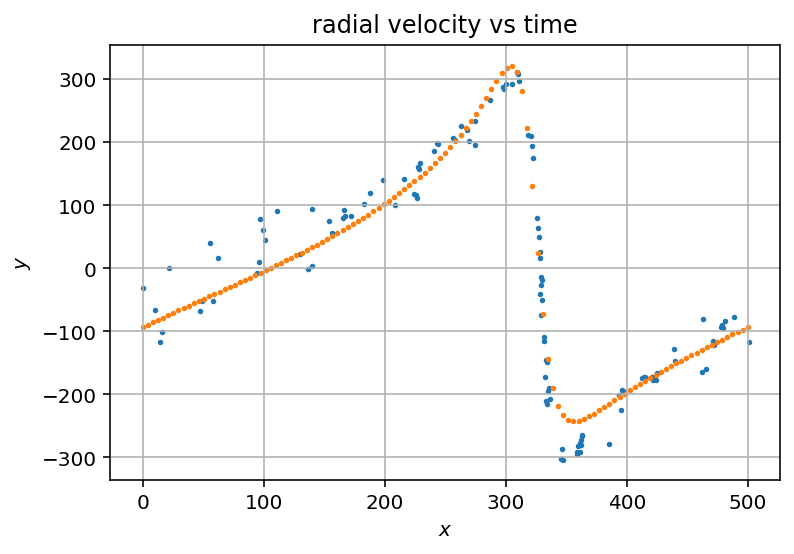

In [15]:
from numpy import linspace
import numpy as np
P1 = 500
T1 = -177
K1 = 281.8
v01 = 39
e1 = 0.685
w1 = -250
t_fit = linspace(0, P1, 119)


vr_fit = vr(t_fit, v01, T1, K1, P1, e1, w1)
y_fit =vr(time_data, v01, T1, K1, P1, e1, w1)

#y_fit = time
#y = radial_velocity
#sigma = uncertainty


plt.scatter(time_data, vr_data, s=3)
plt.scatter(t_fit, vr_fit, s=3 )
plt.title("radial velocity vs time")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
chi_squared(y_fit, vr_data , vr_err)

35.87169850215713

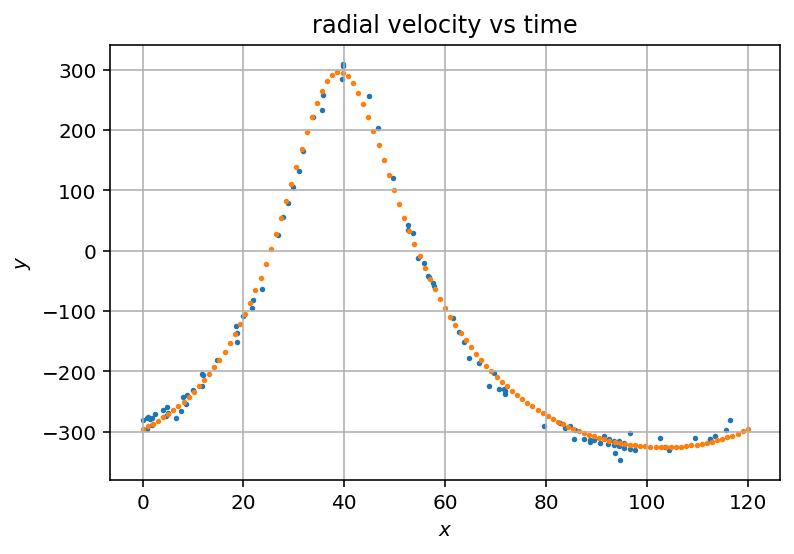

In [16]:
from numpy import linspace
import numpy as np
P2 = 120
T2 = -202
K2 = 311
v02 = -15
e2 = 0.4
w2 = 25
t_fit2 = linspace(0, P2, 119)

vr_fit2 = vr(t_fit2, v02, T2, K2, P2, e2, w2)
y_fit2 =vr(time_data2, v02, T2, K2, P2, e2, w2)


plt.scatter(time_data2, vr_data2, s=3)
plt.scatter(t_fit2, vr_fit2, s=3 )
plt.title("radial velocity vs time")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
chi_squared(y_fit2, vr_data2 , vr_err2)

30.99239858967164

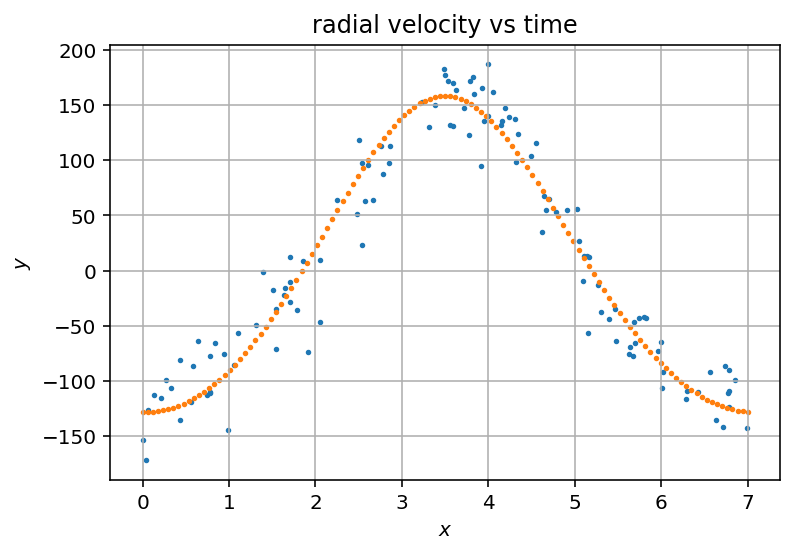

In [17]:
from numpy import linspace
import numpy as np
P3 = 7
T3 = -199.65
K3 = 143
v03 = 15.1
e3 = 0.088
w3 = -19
t_fit3 = linspace(0, P3, 119)

vr_fit3 = vr(t_fit3, v03, T3, K3, P3, e3, w3)
y_fit3 =vr(time_data3, v03, T3, K3, P3, e3, w3)

plt.scatter(time_data3, vr_data3, s=3)
plt.scatter(t_fit3, vr_fit3, s=3 )
plt.title("radial velocity vs time")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
chi_squared(y_fit3, vr_data3 , vr_err3)

For the last step, we calculated $a$ in astronomical units \(AU\) by using the values of $M$ and $P$ of each star in the equation \(12\). 


In [18]:
M1 = 1.82
M2 = 1.12
M3 = 0.98
P1 = 500
P2 = 120
P3 = 7

print("Semi major axis of Star 1 (AU):", "(:.4f)", format(semi_major_axis(P1, M1)))
print("Semi major axis of Star 2 (AU):", "(:.4f)", format(semi_major_axis(P2, M2)))
print("Semi major axis of Star 3 (AU):", "(:.4f)", format(semi_major_axis(P3, M3)))

Semi major axis of Star 1 (AU): (:.4f) 1.505369225113351
Semi major axis of Star 2 (AU): (:.4f) 0.4944997458163812
Semi major axis of Star 3 (AU): (:.4f) 0.07113990589333295


And we also calculated $M_psinI$ in Jupiter masses \($M_J$\) by using the values of $K$, $P$, $M$, $e$, in the equation \(14\).



Table 3: Shows the results for the semi\-major axis $a$ and $M_psinI$ for each star

|  Stars | Semi\-major axis $(a)$ |      $M_psinI$ |
| :----: | :--------------------: | :----------------: |
| Star 1 |    1.505369225113351 | 11.944442732157883 |
| Star 2 |   0.4944997458163812 | 7.4559767204991845 |
| Star 3 |   0.07113990589333295 | 1.3219957195327214 |



In [19]:
K1 = 281.8
K2 = 311
K3 = 143
e1 = 0.685
e2 = 0.4
e3 = 0.088

print("Mpsin(I) of Star 1:", "(:.4f)", format(MpsinI(K1, P1, M1, e1)))
print("Mpsin(I) of Star 2:", "(:.4f)", format(MpsinI(K2, P2, M2, e2)))
print("Mpsin(I) of Star 3:", "(:.4f)", format(MpsinI(K3, P3, M3, e3)))

Mpsin(I) of Star 1: (:.4f) 11.944442732157883
Mpsin(I) of Star 2: (:.4f) 7.4559767204991845
Mpsin(I) of Star 3: (:.4f) 1.3219957195327214


## Discussion

This report was supposed to characterise an extrasolar planet and to find its orbit, the value of the semi\-major axis that we get from the calculations is accurate, since we know every parameter, and the only error could have been given by approximating $M_* +M_p=M_*$ when $M_*>>M_p$ . On the other hand in order to get the best possible values we needed to get $\chi^2$ as much close to zero as possible \(Table 2\), changing the parameters manually. This procedure led to uncertainty in the calculations, in fact the best value of $\chi^2$ that we got was not less than 30, our results could be improved by computing a function that could find the best parameters to get the lowest $\chi^2$ \(i.e. $\chi^2\sim10$\). As a prove of that, by manipulating the parameters in the following cell to get a lower and hence more accurate $\chi^2$, it is possible to see how the mass of the star 1 changes, becoming as a consequence, more precise \(Table 4\).


Table 4: Shows the changes in the parameters, hence in the new results for $\chi^2$ and $M_psinI$

|       Star 1 |  P |   T |   K |  v |  $e$ |   w |      $\chi^2$ |      $M_psinI$ |
| :---------------: | :-: | :---: | :---: | :-: | :---: | :---: | :---------------: | :----------------: |
| First calculation | 500 | \-177 | 281.1 |  39 | 0.685 | \-250 | 68.08113962346616 | 11.944442732157883 |
| Second calculaton | 500 | \-176 |  297 |  42 | 0.705 | \-250 | 57.24168191250656 | 12.254605168128021 |



57.24168191250656

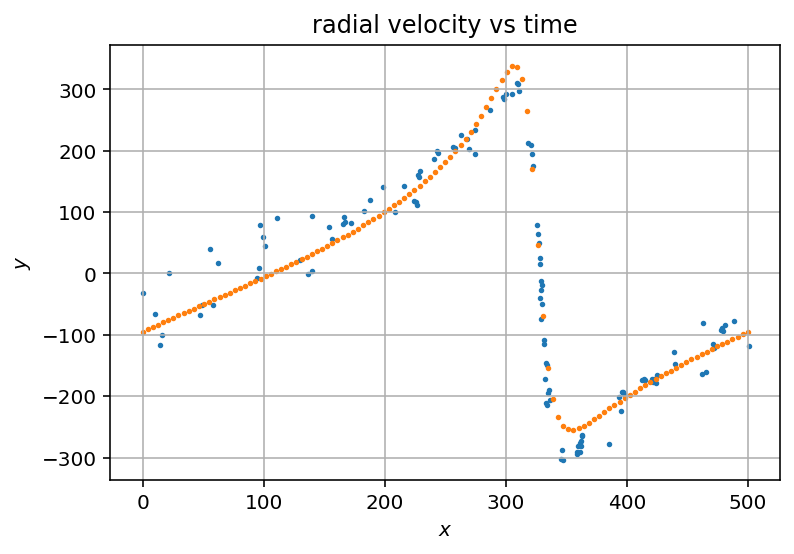

In [23]:
P1 = 500
T1 = -176
K1 = 297
v01 = 42
e1 = 0.705
w1 = -250
t_fit = linspace(0, P1, 119)

vr_fit = vr(t_fit, v01, T1, K1, P1, e1, w1)
y_fit =vr(time_data, v01, T1, K1, P1, e1, w1)

plt.scatter(time_data, vr_data, s=3)
plt.scatter(t_fit, vr_fit, s=3 )
plt.title("radial velocity vs time")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
chi_squared(y_fit, vr_data , vr_err)

In [24]:
print("Mpsin(I) of Star 1:", "(:.4f)", format(MpsinI(K1, P1, M1, e1)))

Mpsin(I) of Star 1: (:.4f) 12.254605168128021


Moreover, the radial velocity method does not give us the value of the inclination $I$ \[2\], the angle between the orbital plane and the plane of the sky, so our result for the mass of the planet is the minimum mass possible \[2\]. Although we can get the actual mass of the planet when $I = \pi/2$, when the orbit is edge\-on to the Earth, since:

$$
sin\left(\frac{\pi}{2}\right)=1
$$

Even if this limitation does not have a large impact on statistical studies, since edge\-on systems, with an inclination angle close to $90\degree$are much more frequent than pole\-on configurations, the measurements could then be improved by computing a function that could find the value of the inclination $I$, in order to get always the proper mass instead of the minimum value of the mass. 


## Conclusion

To sum up, the results for the semi\-major axis $a$ are more accurate than the calculations of the mass of each star, since we do not have the inclination $I$ and we can get the mass only in terms of $M_psinI$, which is the minimum mass that the planet can have.



## References

1. de Pater I, Lissauer JJ, editors. Extrasolar Planets \[Internet\]. 2nd ed. Cambridge University Press. Cambridge: Cambridge University Press; 2015. p. 489–511. Available from: [https://www.cambridge.org/core/services/aop\-cambridge\-core/content/view/B9D9098C7D89009AF578B7530CB4D844/9781316165270c12\_p489\-511\_CBO.pdf/extrasolar\_planets.pdf](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/B9D9098C7D89009AF578B7530CB4D844/9781316165270c12_p489-511_CBO.pdf/extrasolar_planets.pdf) 

2. Lovis C, Fischer D. Radial Velocity \[Internet\]. Available from: [http://exoplanets.astro.yale.edu/workshop/EPRV/Bibliography\_files/Radial\_Velocity.pdf](http://exoplanets.astro.yale.edu/workshop/EPRV/Bibliography_files/Radial_Velocity.pdf) 

